## Data Cleaning

#### Importing pandas

In [2]:
import pandas as pd

#### Importing the csv files for cleaning the data

In [3]:
bookings_data = pd.read_csv('datasets/fact_bookings.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_fact_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')

#### Let's explore bookings data

In [4]:
bookings_data.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


-Here we can observe **negative values** in no_guests column.  
-Having a **negative value** for no_guests is an error

Now lets check the no of negative records for no_guests column

In [5]:
bookings_data[bookings_data.no_guests < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


Let's check the size of the data before removing the records with **negative values**

In [6]:
bookings_data.shape

(134590, 12)

Let's remove the **negative values** for no_guests

In [7]:
bookings_data = bookings_data[bookings_data.no_guests > 0]
bookings_data.shape

(134578, 12)

We can observe that 12 records have been removed

#### Now let's explore the revenue_generated column

In [8]:
bookings_data.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [9]:
bookings_data.revenue_generated.min().item(),bookings_data.revenue_generated.max().item() 

(6500, 28560000)

Here we can clearly observe that the maximum revenue generated is 28.5million which is extemely high for 1 day

Let's identify the outliers 

We will use the below formula to find the outliers:
- Outliers = any value > mean + 3 * std_dev
- mean = represents the avg_value of all the records
- std_dev = represents the value above/below its mean

#### Computing the mean, std_dev

In [10]:
mean, std_dev = bookings_data.revenue_generated.mean(), bookings_data.revenue_generated.std()

In [11]:
mean, std_dev = mean.item(), std_dev.item()
mean, std_dev

(15378.036937686695, 93040.1549314641)

#### Setting the upper and lower thresold for outliers

In [12]:
higher_limit = mean + 3*std_dev
higher_limit

294498.50173207896

In [13]:
lower_limit = mean - 3*std_dev
lower_limit

-263742.4278567056

#### Let's check the no of records which are below the lower thresold

In [14]:
bookings_data[bookings_data.revenue_generated < lower_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


#### Let's check the no of records which are below the upper thresold

In [15]:
bookings_data[bookings_data.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


#### Removing the records where revenue generated is more than upper thresold

Size before removing

In [16]:
bookings_data.shape

(134578, 12)

Size after removing

In [17]:
bookings_data = bookings_data[bookings_data.revenue_generated < higher_limit]
bookings_data.shape

(134573, 12)

#### Let's check for null values

In [18]:
df_fact_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

Here we can observe that capacity column has 2 null values

In [19]:
median_capacity = df_fact_agg_bookings.capacity.median().item()
median_capacity

25.0

In [20]:
df_fact_agg_bookings[df_fact_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


#### Filling two null values with median value of the same column 

In [21]:
df_fact_agg_bookings.fillna(median_capacity, inplace=True)

In [22]:
df_fact_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

#### Now let's check for successful bookings > capacity and if any let's remove those data points 

In [23]:
df_fact_agg_bookings[df_fact_agg_bookings.successful_bookings > df_fact_agg_bookings.capacity]


,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [24]:
df_fact_agg_bookings.shape

(9200, 5)

#### Remove these data points from the data frame

In [25]:
df_fact_agg_bookings =  df_fact_agg_bookings[df_fact_agg_bookings.successful_bookings <= df_fact_agg_bookings.capacity]

df_fact_agg_bookings.shape

(9194, 5)

## Data Transformation

In [26]:
df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


#### Let's find out the occupancy rates

In [27]:
df_fact_agg_bookings["occupancy_rates"] = df_fact_agg_bookings.successful_bookings / df_fact_agg_bookings.capacity

df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rates
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


#### Now let's transform the last column i.e occupancy_rates

In [28]:
df_fact_agg_bookings["occupancy_rates"] = df_fact_agg_bookings.occupancy_rates.apply(lambda x: round(x*100, 2))

df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rates
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


## Generating Insights

#### Average occupancy rates across room classes

In [29]:
df_fact_agg_bookings.groupby("room_category")["occupancy_rates"].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occupancy_rates, dtype: float64

#### But we need room class instead of room category

In [30]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


#### Merging room_id of df_rooms with room_category of df_fact_agg_bookings

In [31]:
df_merged = pd.merge(df_fact_agg_bookings, df_rooms,left_on="room_category", right_on="room_id")

df_merged.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rates,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


#### Getting the occupancy rates according to the room class

In [32]:
df_merged.groupby("room_class")["occupancy_rates"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occupancy_rates, dtype: float64

#### Let's find out the average occupancy rate according to the city

In [33]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


#### Let's merge df_hotels and df_fact_agg_bookings to get the avg occupancy_rates w.r.t cities

In [34]:
df_fact_hotel = pd.merge(df_fact_agg_bookings, df_hotels, on="property_id")

df_fact_hotel.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rates,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,Atliq City,Business,Mumbai


#### Let's find out average occupancy as per city

<Axes: ylabel='city'>

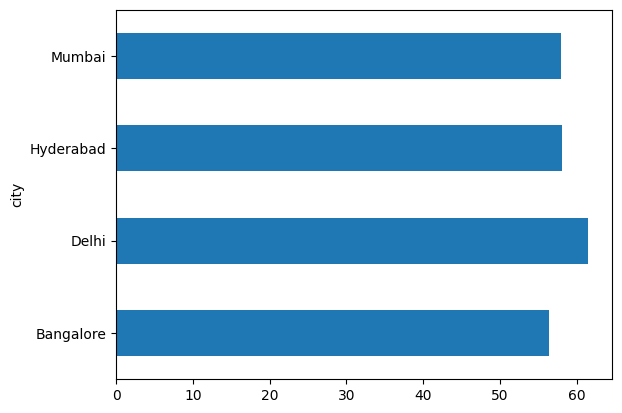

In [35]:
df_fact_hotel.groupby("city")["occupancy_rates"].mean().plot(kind="barh")

#### Let's check the occupancy rates in weekdays and weekends

In [36]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [37]:
df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rates
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


#### Merging 2 tables to get the date mapping

In [38]:
df_merge_date = pd.merge(df_fact_agg_bookings, df_date, left_on="check_in_date", right_on="date")

df_merge_date.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rates,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,10-May-22,May 22,W 20,weekeday


#### Just groupby according to day type 

In [39]:
df_merge_date.groupby("day_type")["occupancy_rates"].mean()

day_type
weekeday    50.883140
weekend     72.343625
Name: occupancy_rates, dtype: float64

#### Let's find out revenue realized per city

In [40]:
bookings_data.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [41]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [42]:
df_merge_bookings_hotels = pd.merge(bookings_data, df_hotels, on="property_id")

df_merge_bookings_hotels.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


#### Total revenue realized by cities

In [43]:
df_merge_bookings_hotels.groupby("city")["revenue_realized"].sum().sort_values()

city
Delhi        294404488
Hyderabad    325179310
Bangalore    420383550
Mumbai       668569251
Name: revenue_realized, dtype: int64

#### Finding revenue realized month by month

In [44]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [45]:
bookings_data.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [46]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [47]:
bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


#### In **df_date** the date column is an object, lets convert it into an appropriate type

In [48]:
df_date["date"] = pd.to_datetime(df_date["date"])

C:\Users\adith\AppData\Local\Temp\ipykernel_17276\697511496.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"])


In [49]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


#### In **bookings_data** the date column is an object, lets convert it into an appropriate type

In [50]:
bookings_data["check_in_date"] = pd.to_datetime(bookings_data["check_in_date"], format="mixed")

In [51]:
bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 13.3+ MB


In [52]:
df_merge_date_bookings_data = pd.merge(bookings_data, df_date, left_on="check_in_date", right_on="date")

df_merge_date_bookings_data.tail()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
92573,Jul312217564RT45,17564,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend
92574,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend
92575,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,2022-07-31,Jul 22,W 32,weekend
92576,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend
92577,Jul312217564RT410,17564,31-07-22,2022-07-31,1/8/2022,2.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920,2022-07-31,Jul 22,W 32,weekend


#### Now let's group them according to month and aggregate the revenue realized

In [53]:
df_merge_date_bookings_data.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64